In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [109]:
#Leemos el dataframe 
df = pd.read_csv('ValoresAtipicosMx.csv', index_col="id")
df.head(3)

,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
35797,2024-09-25,Villa Dante,153786,Dici,2010-06-28,a few days or more,f,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,...,4.88,4.86,4.92,4.93,4.93,4.81,1.0,1.0,0.0,0.0
44616,2024-09-26,Condesa Haus,196253,Fernando,2010-08-09,within an hour,t,t,Mexico City,Cuauhtémoc,...,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0
67703,2024-09-26,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,2011-01-04,within an hour,t,t,Mexico City,Cuauhtémoc,...,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0


In [110]:
#Convertimos cadenas a valores numericos 
# Si hay valores no mapeados, remplázalos por 0 (o 1, dependiendo del contexto)
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0}).fillna(0).astype(int)


df['property_type'] = df['property_type'].map({
    'Entire villa': 0,
    'Entire home': 1,
    'Entire rental unit': 2,
    'Entire loft': 3,
    'Private room': 4,
    'Private room in rental unit': 5,
    'Private room in home': 6,
    'Private room in condo': 7,
    'Private room in guest suite': 8,
    'Entire condo': 9,
    'Private room in serviced apartment': 10,
    'Room in serviced apartment': 11,
    'Entire guest suite': 12,
    'Private room in townhouse': 13,
    'Room in boutique hotel': 14,
    'Private room in bed and breakfast': 15,
    'Shared room in rental unit': 16,
    'Entire serviced apartment': 17,
    'Tiny home': 18,
    'Entire guesthouse': 19,
    'Private room in guesthouse': 20,
    'Private room in loft': 21,
    'Entire bungalow': 22,
    'Casa particular': 23,
    'Shared room in loft': 24,
    'Entire townhouse': 25,
    'Private room in tiny home': 26,
    'Shared room in guesthouse': 27,
    'Room in bed and breakfast': 28,
    'Shared room in hostel': 29,
    'Private room in farm stay': 30,
    'Shared room in home': 31,
    'Private room in villa': 32,
    'Entire cabin': 33,
    'Private room in casa particular': 34,
    'Room in hotel': 35,
    'Private room in floor': 36,
    'Private room in cabin': 37,
    'Shared room in guest suite': 38,
    'Room in aparthotel': 39,
    'Entire place': 40,
    'Private room in hostel': 41,
    'Earthen home': 42,
    'Entire hostel': 43,
    'Private room in earthen home': 44,
    'Private room in dorm': 45,
    'Private room in hut': 46,
    'Entire cottage': 47,
    'Entire chalet': 48,
    'Shared room in dorm': 49,
    'Entire in-law': 50,
    'Holiday park': 51,
    'Private room in dome': 52,
    'Shared room in condo': 53,
    'Campsite': 54,
    'Private room in vacation home': 55,
    'Room in casa particular': 56,
    'Castle': 57,
    'Private room in barn': 58,
    'Shared room in hotel': 59,
    'Farm stay': 60,
    'Shared room in tiny home': 61,
    'Hut': 62,
    'Shared room in cabin': 63,
    'Private room in cottage': 64,
    'Entire home/apt': 65,
    'Room in hostel': 66,
    'Shared room in serviced apartment': 67,
    'Entire vacation home': 68,
    'Shared room in tent': 69,
    'Shared room in bed and breakfast': 70,
    'Private room in shipping container': 71,
    'Private room in nature lodge': 72,
    'Private room in tower': 73,
    'Private room in lighthouse': 74,
    'Shared room in casa particular': 75,
    'Shared room in townhouse': 76,
    'Shared room in farm stay': 77,
    'Shared room in boutique hotel': 78,
    'Shipping container': 79,
    'Private room in pension': 80,
    'Private room in bungalow': 81,
    'Dome': 82,
    'Tent': 83,
    'Private room in chalet': 84,
    'Private room in tent': 85,
    'Private room in castle': 86,
    'Private room in houseboat': 87,
    'Boat': 88,
    'Private room in resort': 89,
    'Private room in minsu': 90,
    'Tower': 91
}).fillna(-1).astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26582 entries, 35797 to 1252229157495978163
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26582 non-null  object 
 1   name                                          26582 non-null  object 
 2   host_id                                       26582 non-null  int64  
 3   host_name                                     26582 non-null  object 
 4   host_since                                    26582 non-null  object 
 5   host_response_time                            26582 non-null  object 
 6   host_is_superhost                             26582 non-null  int32  
 7   host_identity_verified                        26582 non-null  int32  
 8   neighbourhood                                 26582 non-null  object 
 9   neighbourhood_cleansed                        26

In [111]:
#Filtramos el dataframe para Entire home/apt
df_filtrado = df[df['room_type'] == 'Entire home/apt']
df1 = df_filtrado[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df1

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
35797,Entire home/apt,3865.000000,0.894906,0,2.0,1.0,4.86,0,1,0
44616,Entire home/apt,1511.648404,0.930000,1,3.1,1.0,4.70,0,1,1
67703,Entire home/apt,2029.000000,0.570000,1,4.0,1.0,4.75,0,1,2
70644,Entire home/apt,1140.000000,1.000000,1,2.0,1.0,4.96,0,1,2
107078,Entire home/apt,3633.000000,1.000000,1,2.0,2.0,5.00,0,1,3
...,...,...,...,...,...,...,...,...,...,...
1251627039124173262,Entire home/apt,700.000000,0.894906,0,4.0,1.0,4.86,0,1,2
1251642490491185216,Entire home/apt,1900.000000,0.894906,0,4.0,2.0,4.86,0,1,9
1251769567383709085,Entire home/apt,1200.000000,0.894906,0,2.0,1.0,4.86,0,1,2


In [112]:
#Funcion de regresion lineal simple 
from sklearn.linear_model import LinearRegression

def regresion_lineal(df_pais, x_col, y_col):
    # Seleccionar las columnas de las variables independientes y dependientes
    var_x = df_pais[[x_col]]
    var_y = df_pais[y_col]

    # Crear el modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(X=var_x, y=var_y)

    # Hacer las predicciones usando los datos de X
    y_pred = model.predict(X=var_x)  # Realizar predicciones

    # Insertar las predicciones como una nueva columna en el DataFrame
    # Crear un nombre único para la columna de predicciones
    nombre_columna = f"Predic_{x_col}_{y_col}"
    df_pais.insert(0, nombre_columna, y_pred)

    # Coeficientes de la regresión (pendiente y ordenada al origen)
    pendiente = model.coef_[0]  # La pendiente (m)
    ordenada = model.intercept_  # La ordenada al origen (b)

    # Crear la ecuación de la recta
    ecuacion = f"y = {pendiente:.4f}x + {ordenada:.4f}"

    # Graficar los datos reales y las predicciones
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, color='blue',data=df_pais, label='Datos reales')
    sns.scatterplot(x=x_col, y=nombre_columna, color='red',data=df_pais, label='Predicciones')
    plt.title(f'Regresión lineal: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

    # Coeficiente de determinación (R^2)
    coef_deter = model.score(X=var_x, y=var_y)  # Coeficiente de determinación (R^2)

    # Coeficiente de correlación (r)
    coef_correl = np.sqrt(coef_deter)  # Coeficiente de correlación (r)

    # Devolver los coeficientes y las predicciones
    return coef_correl, coef_deter, ecuacion

**Entire home/apt**

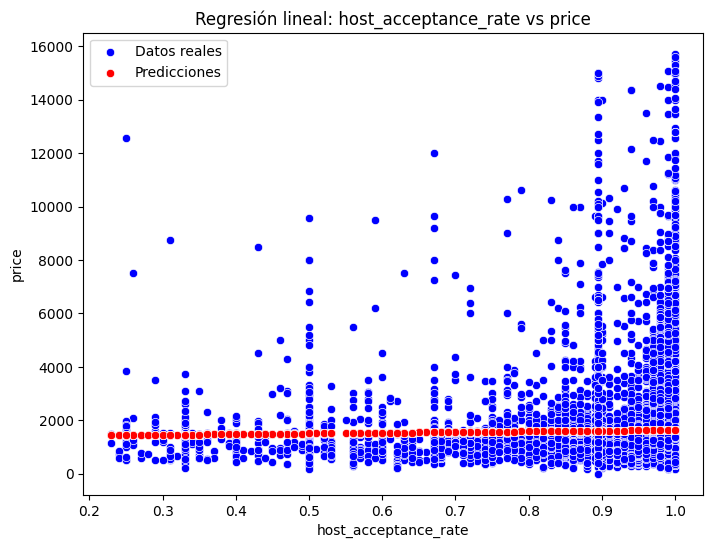

Coeficiente de correlación (r): 0.020462987458134838
Coeficiente de determinación (R^2): 0.0004187338557117837
Ecuación de la recta: y = 259.1230x + 1371.6934


In [113]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

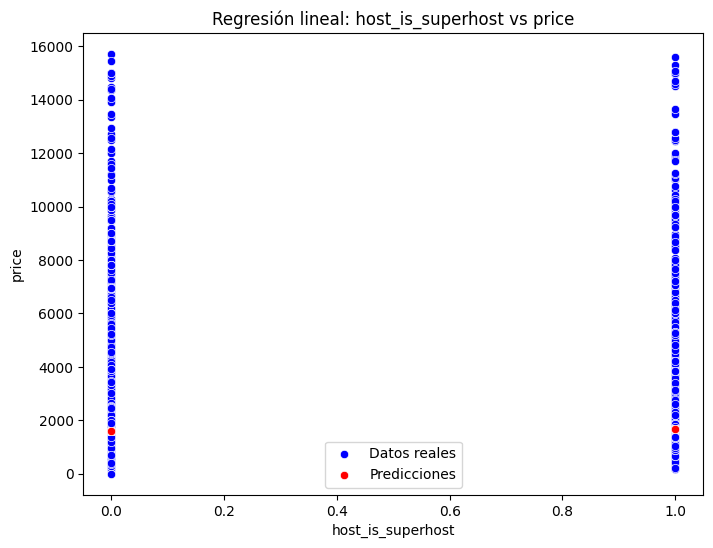

Coeficiente de correlación (r): 0.02497675465728524
Coeficiente de determinación (R^2): 0.0006238382732102199
Ecuación de la recta: y = 70.6494x + 1587.3012


In [114]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

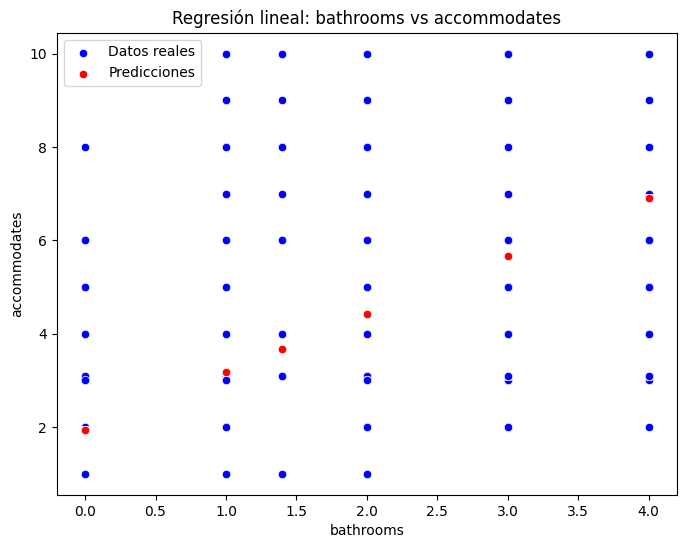

Coeficiente de correlación (r): 0.4769897081784841
Coeficiente de determinación (R^2): 0.2275191817081954
Ecuación de la recta: y = 1.2460x + 1.9289


In [115]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

	

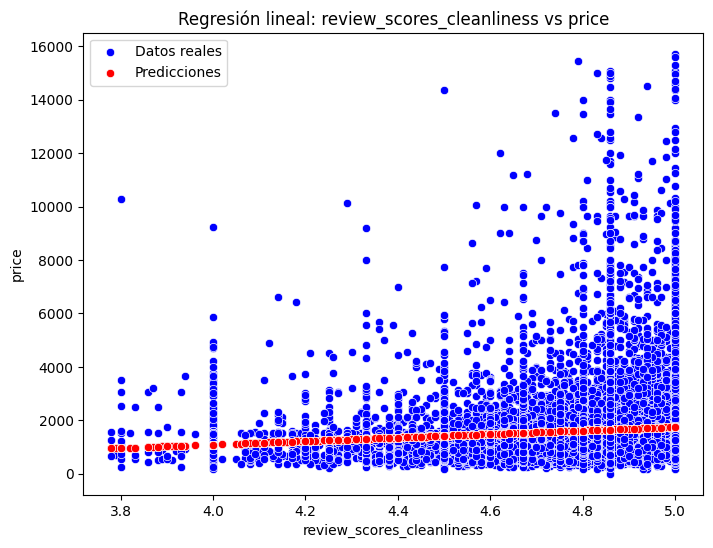

Coeficiente de correlación (r): 0.0909652743083277
Coeficiente de determinación (R^2): 0.008274681129989303
Ecuación de la recta: y = 652.8703x + -1524.7732


In [116]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

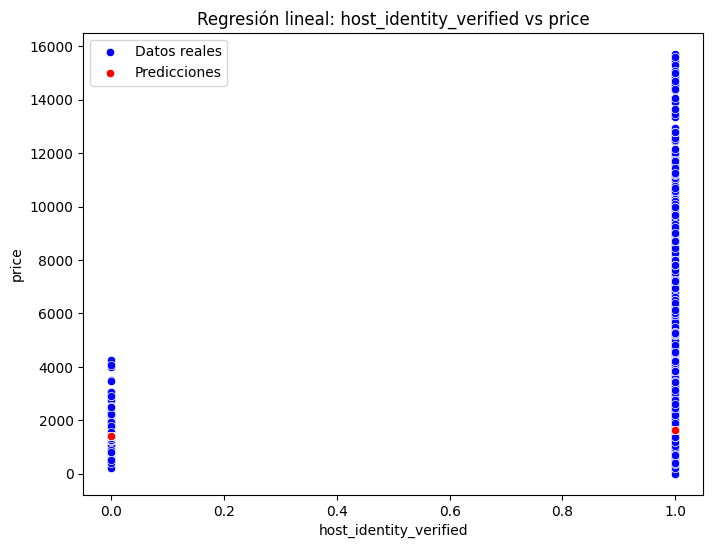

Coeficiente de correlación (r): 0.02217792316051198
Coeficiente de determinación (R^2): 0.0004918602757135737
Ecuación de la recta: y = 198.6663x + 1423.3821


In [117]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

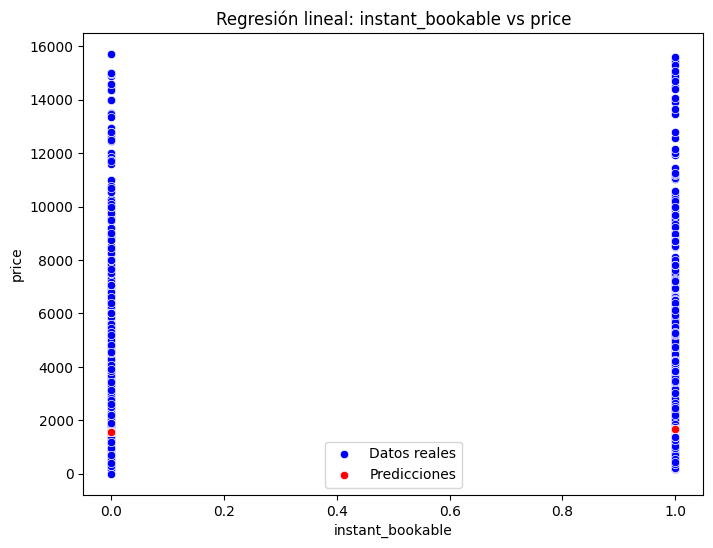

Coeficiente de correlación (r): 0.04230464053647393
Coeficiente de determinación (R^2): 0.0017896826109202735
Ecuación de la recta: y = 119.6876x + 1566.6975


In [118]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

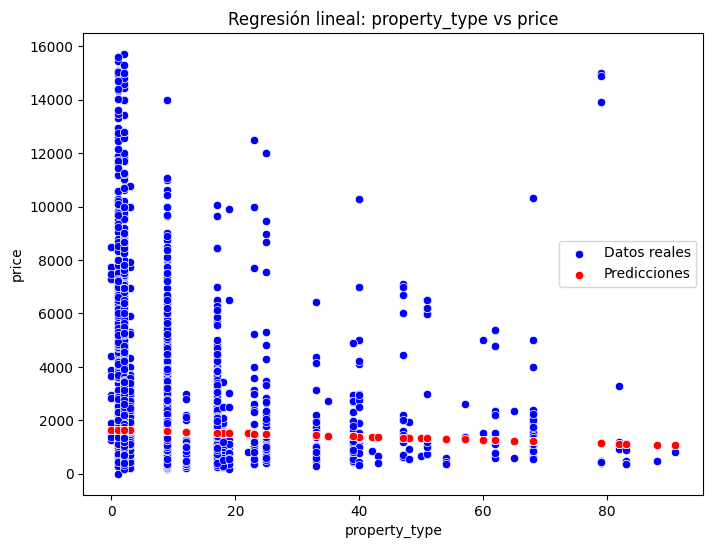

Coeficiente de correlación (r): 0.03892317658887405
Coeficiente de determinación (R^2): 0.0015150136757686727
Ecuación de la recta: y = -6.4804x + 1652.4830


In [119]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df1, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

In [120]:
#Filtramos el dataframe para Private room
df_filtrado2 = df[df['room_type'] == 'Private room']
df2 = df_filtrado2[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df2

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
131610,Private room,1511.648404,0.894906,0,2.0,1.0,4.86,0,0,4
171109,Private room,335.000000,0.780000,1,2.0,1.0,4.61,0,1,5
1013504,Private room,384.000000,1.000000,1,1.0,2.0,4.92,0,1,6
1051636,Private room,947.000000,0.894906,0,1.0,1.0,4.97,0,0,7
1066945,Private room,1200.000000,0.750000,0,2.0,1.0,4.97,0,1,8
...,...,...,...,...,...,...,...,...,...,...
1251897198681126075,Private room,262.000000,0.894906,0,2.0,2.0,4.86,1,1,6
1252141718111439700,Private room,488.000000,1.000000,1,4.0,1.0,4.86,1,1,20
1252159821531694005,Private room,2800.000000,1.000000,0,2.0,1.0,4.86,1,1,35


**Private room**

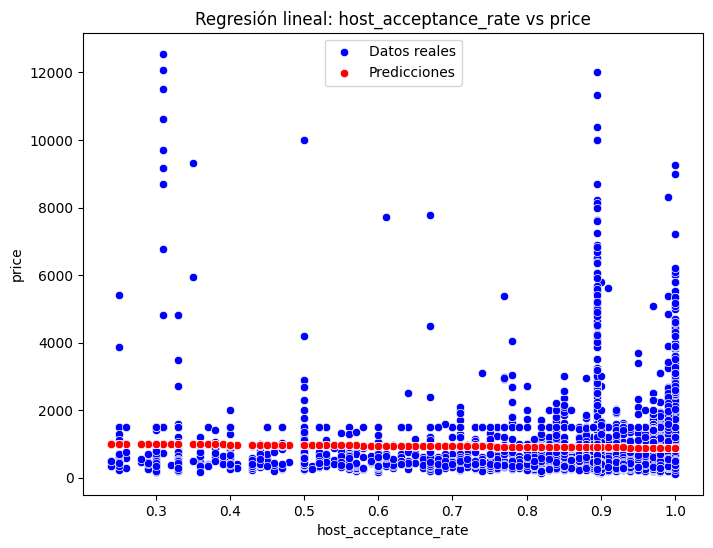

Coeficiente de correlación (r): 0.028849777184993933
Coeficiente de determinación (R^2): 0.0008323096436237964
Ecuación de la recta: y = -165.3817x + 1046.7502


In [121]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

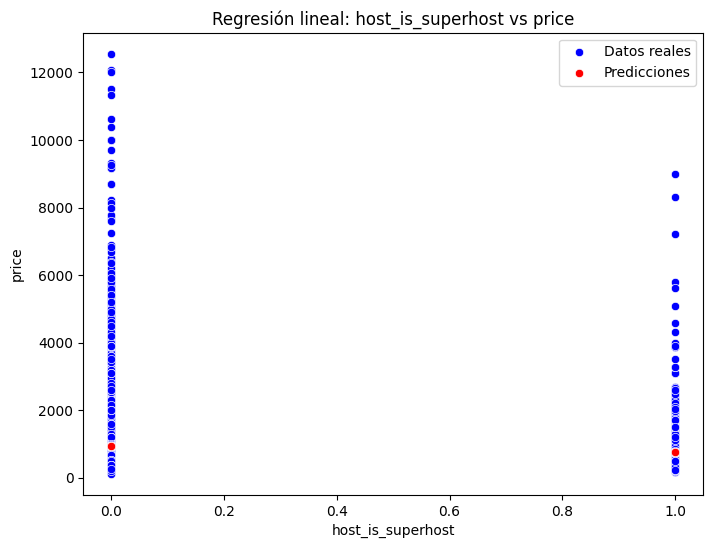

Coeficiente de correlación (r): 0.10565244202928468
Coeficiente de determinación (R^2): 0.01116243850675136
Ecuación de la recta: y = -202.9448x + 951.7311


In [122]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

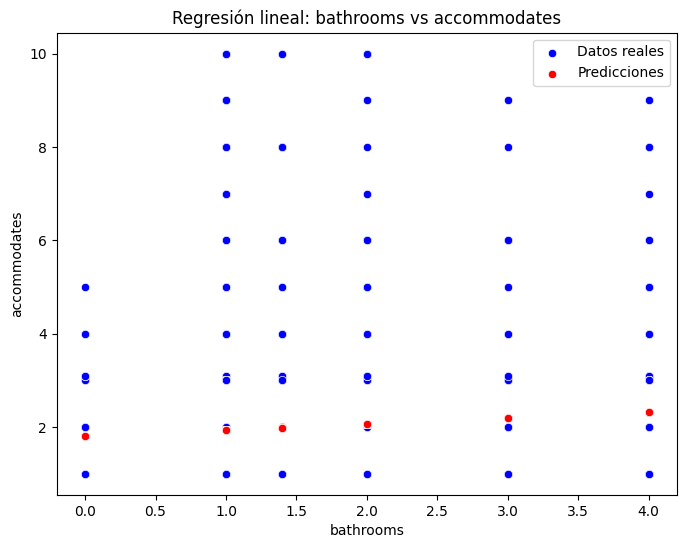

Coeficiente de correlación (r): 0.07270331094898526
Coeficiente de determinación (R^2): 0.0052857714229448405
Ecuación de la recta: y = 0.1323x + 1.7989


In [123]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")


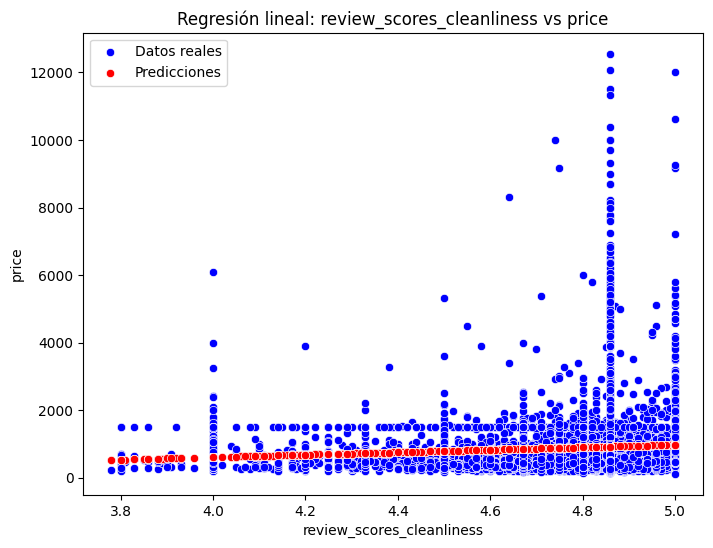

Coeficiente de correlación (r): 0.09700096631132675
Coeficiente de determinación (R^2): 0.009409187465331148
Ecuación de la recta: y = 367.7073x + -866.5142


In [124]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

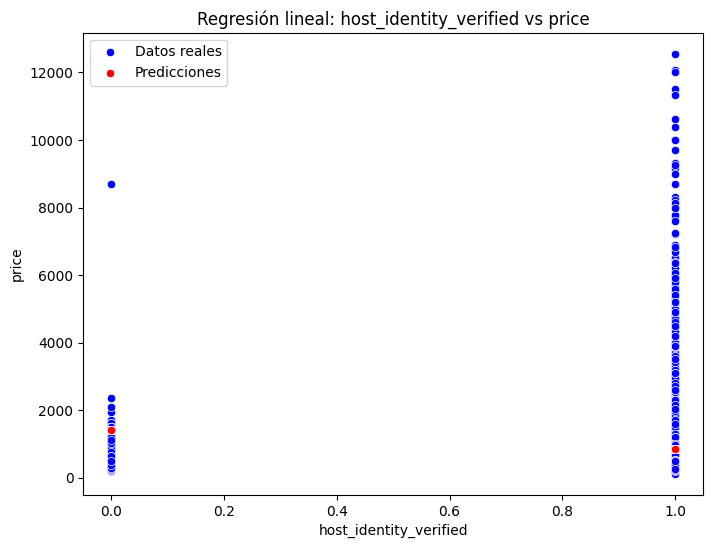

Coeficiente de correlación (r): 0.16742482470825162
Coeficiente de determinación (R^2): 0.02803107192858878
Ecuación de la recta: y = -557.1277x + 1415.1472


In [125]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

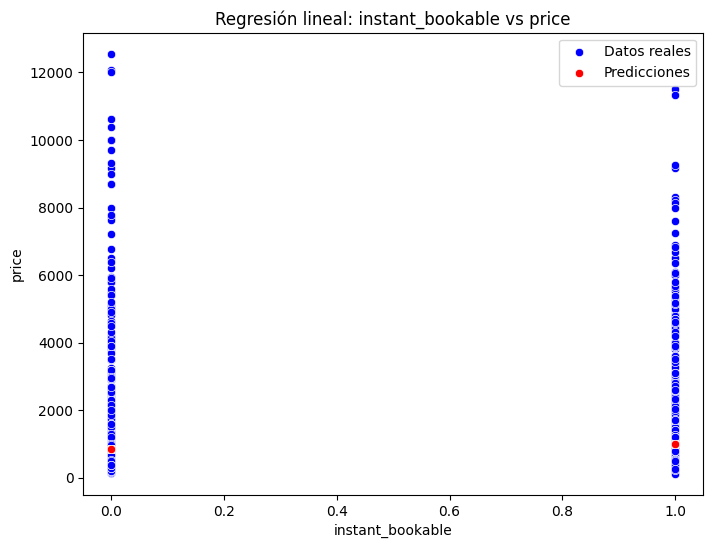

Coeficiente de correlación (r): 0.07263431747221166
Coeficiente de determinación (R^2): 0.005275744074654032
Ecuación de la recta: y = 131.4254x + 853.7763


In [126]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

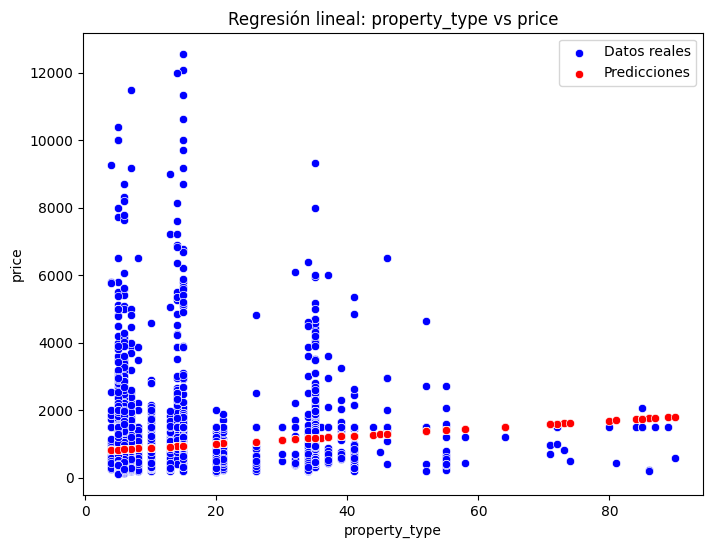

Coeficiente de correlación (r): 0.1382926836663179
Coeficiente de determinación (R^2): 0.019124866355632264
Ecuación de la recta: y = 11.4542x + 776.2079


In [127]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df2, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

**Shared room**

In [128]:
#Filtramos el dataframe para Private room
df_filtrado3 = df[df['room_type'] == 'Shared room']
df3 = df_filtrado3[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df3

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
617137,Shared room,1511.648404,0.894906,0,2.0,1.0,4.86,0,0,16
3197924,Shared room,640.000000,0.900000,0,1.0,2.0,4.86,1,1,24
5434219,Shared room,290.000000,0.850000,1,3.1,1.4,4.47,0,1,27
6972071,Shared room,5314.000000,0.310000,0,3.1,4.0,4.86,0,1,29
6076798,Shared room,550.000000,0.940000,1,3.1,3.0,4.93,1,1,31
...,...,...,...,...,...,...,...,...,...,...
1239163343779403019,Shared room,1200.000000,1.000000,0,6.0,1.0,4.86,0,1,31
1245764268727921299,Shared room,70.000000,1.000000,0,2.0,1.0,4.86,1,1,16
1246455131724928238,Shared room,70.000000,1.000000,0,2.0,1.0,4.86,1,1,16


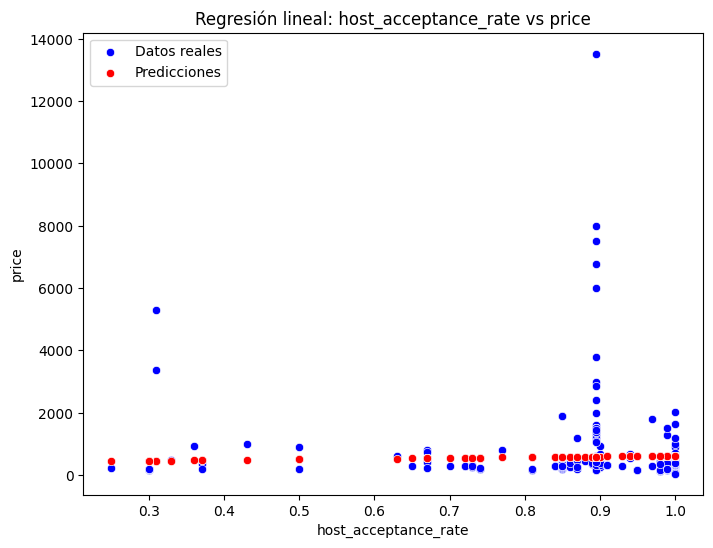

Coeficiente de correlación (r): 0.0519052459443411
Coeficiente de determinación (R^2): 0.0026941545565425384
Ecuación de la recta: y = 232.2019x + 387.4996


In [129]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

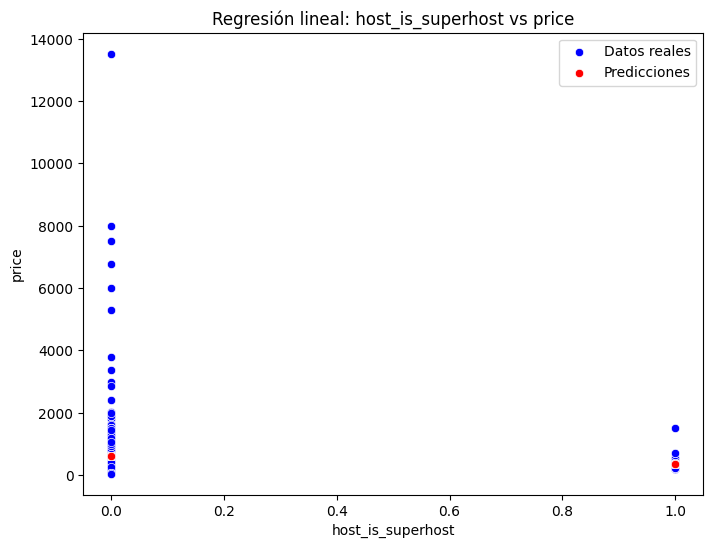

Coeficiente de correlación (r): 0.06695237744357972
Coeficiente de determinación (R^2): 0.0044826208453475624
Ecuación de la recta: y = -240.4658x + 605.6320


In [130]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

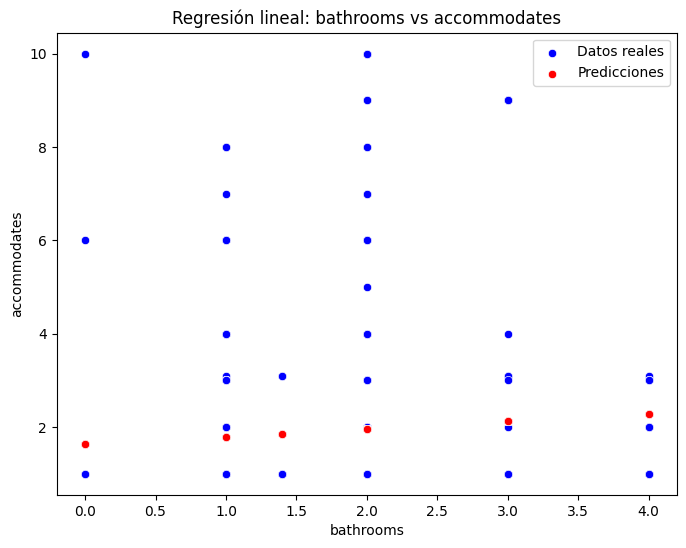

Coeficiente de correlación (r): 0.0793667099149081
Coeficiente de determinación (R^2): 0.006299074642717173
Ecuación de la recta: y = 0.1647x + 1.6272


In [131]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

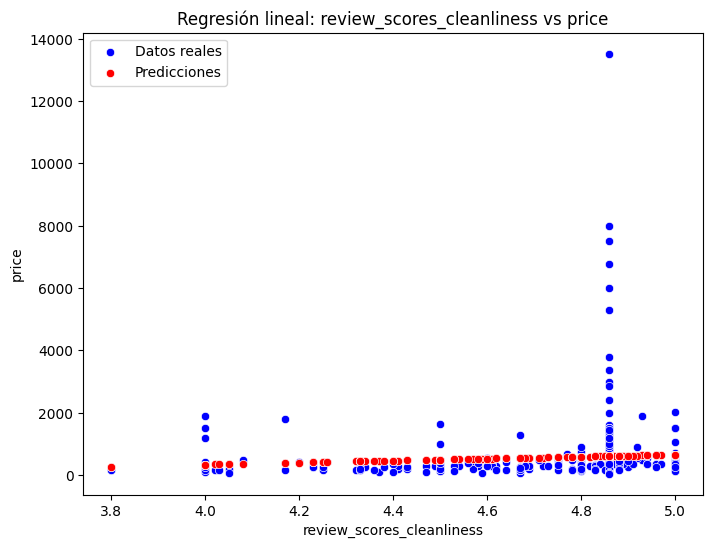

Coeficiente de correlación (r): 0.07497887932521337
Coeficiente de determinación (R^2): 0.005621832344864908
Ecuación de la recta: y = 317.7374x + -933.7796


In [132]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

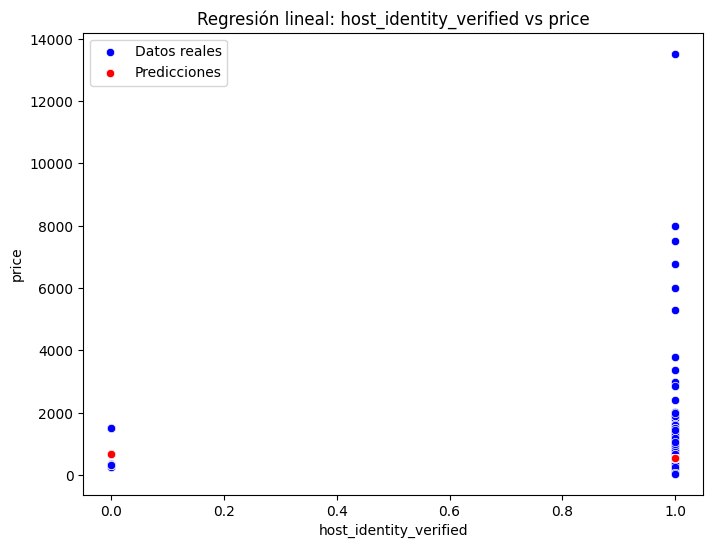

Coeficiente de correlación (r): 0.045472897739892104
Coeficiente de determinación (R^2): 0.0020677844288626845
Ecuación de la recta: y = -128.2146x + 687.1587


In [133]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

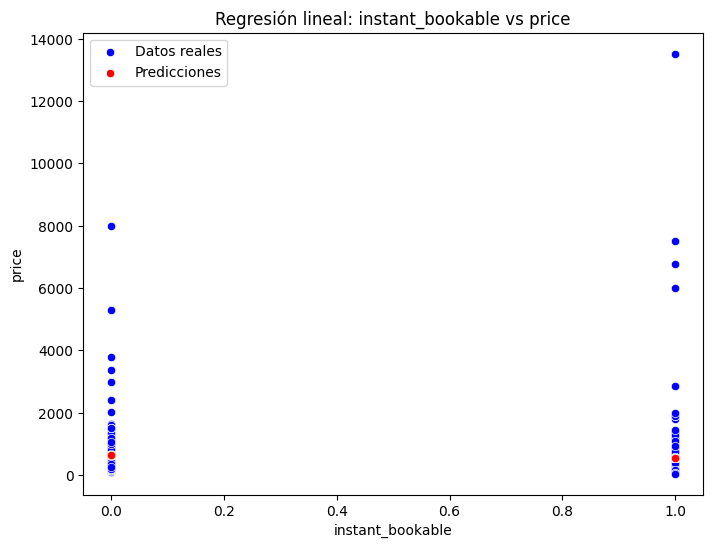

Coeficiente de correlación (r): 0.04575748289156027
Coeficiente de determinación (R^2): 0.002093747240571431
Ecuación de la recta: y = -98.7201x + 634.3289


In [134]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

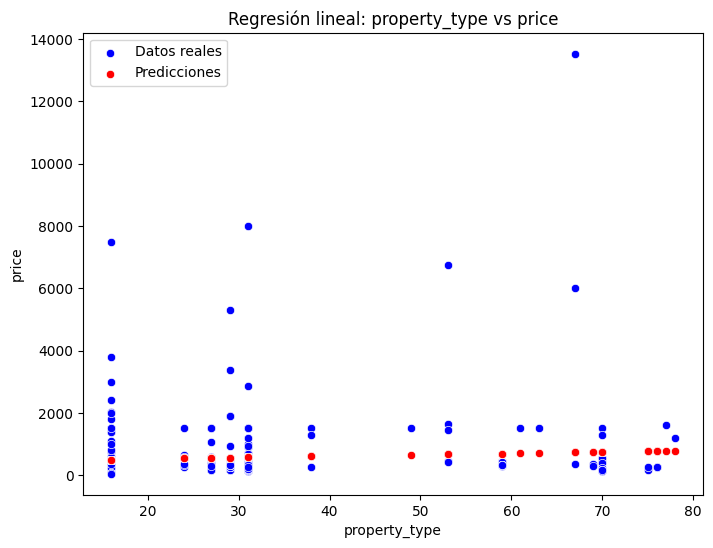

Coeficiente de correlación (r): 0.06459471050414523
Coeficiente de determinación (R^2): 0.00417247662511433
Ecuación de la recta: y = 4.4701x + 434.7794


In [135]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df3, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

**Hotel room**

In [136]:
#Filtramos el dataframe para Private room
df_filtrado4 = df[df['room_type'] == 'Hotel room']
df4 = df_filtrado4[['room_type', 'price', 'host_acceptance_rate', 'host_is_superhost', 'accommodates', 'bathrooms', 'review_scores_cleanliness', 'instant_bookable','host_identity_verified','property_type']]
df4

,room_type,price,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,review_scores_cleanliness,instant_bookable,host_identity_verified,property_type
id,,,,,,,,,,
281134,Hotel room,1511.648404,0.930000,1,3.0,1.0,5.00,1,1,11
1565220,Hotel room,1511.648404,0.920000,1,2.0,1.0,5.00,0,1,14
1736063,Hotel room,1511.648404,0.920000,1,2.0,1.0,4.97,0,1,14
571166,Hotel room,1872.000000,0.930000,1,3.0,1.0,5.00,1,1,11
737328,Hotel room,1275.000000,0.890000,0,2.0,1.0,4.84,1,1,11
...,...,...,...,...,...,...,...,...,...,...
1191430079828817253,Hotel room,5951.000000,0.894906,0,8.0,4.0,4.86,1,0,35
1191430130484570539,Hotel room,5951.000000,0.894906,0,8.0,4.0,4.86,1,0,35
1191430238014754309,Hotel room,5951.000000,0.894906,0,8.0,4.0,4.86,1,0,35


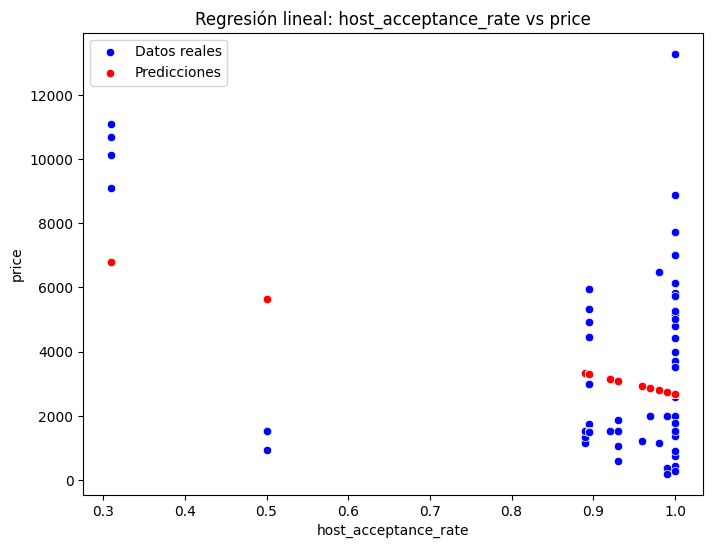

Coeficiente de correlación (r): 0.34522413358114296
Coeficiente de determinación (R^2): 0.11917970240685083
Ecuación de la recta: y = -5958.0154x + 8632.8585


In [137]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente, independiente)
#1 -> price vs host_acceptance_rate

#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'host_acceptance_rate','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

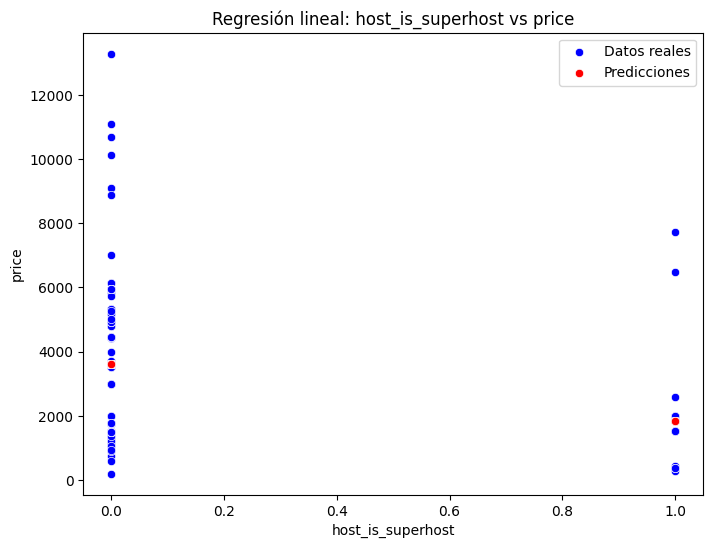

Coeficiente de correlación (r): 0.30633205925905543
Coeficiente de determinación (R^2): 0.09383933052989346
Ecuación de la recta: y = -1769.1901x + 3602.3295


In [138]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#2 -> price vs host_is_superhost


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'host_is_superhost','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

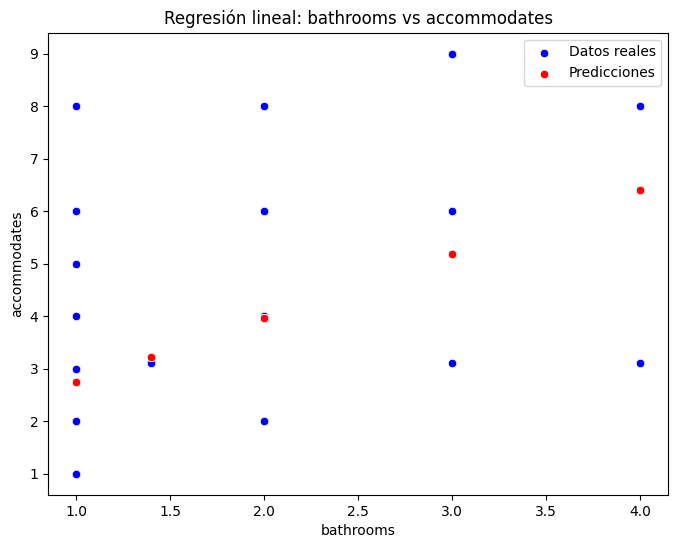

Coeficiente de correlación (r): 0.5786483634422354
Coeficiente de determinación (R^2): 0.3348339285143773
Ecuación de la recta: y = 1.2196x + 1.5190


In [139]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#3 -> accommodates vs bathrooms


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'bathrooms','accommodates')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

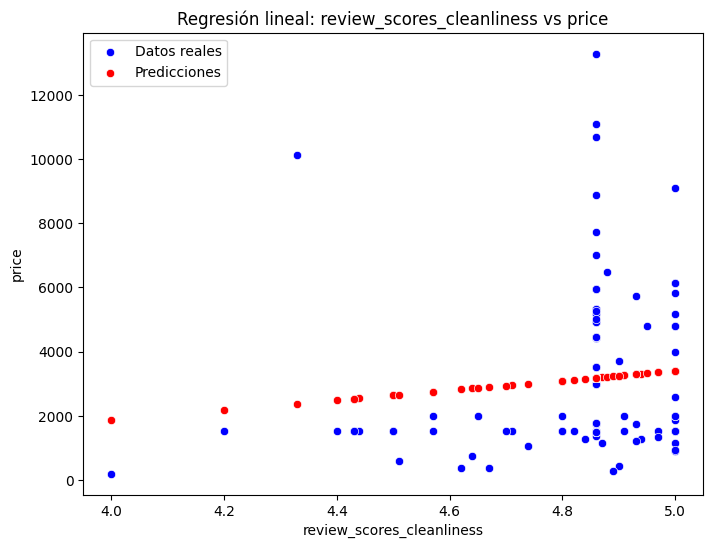

Coeficiente de correlación (r): 0.1044068632083432
Coeficiente de determinación (R^2): 0.010900793085005689
Ecuación de la recta: y = 1514.8474x + -4178.5921


In [140]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#4 -> price vs review_scores_cleanliness


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'review_scores_cleanliness','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

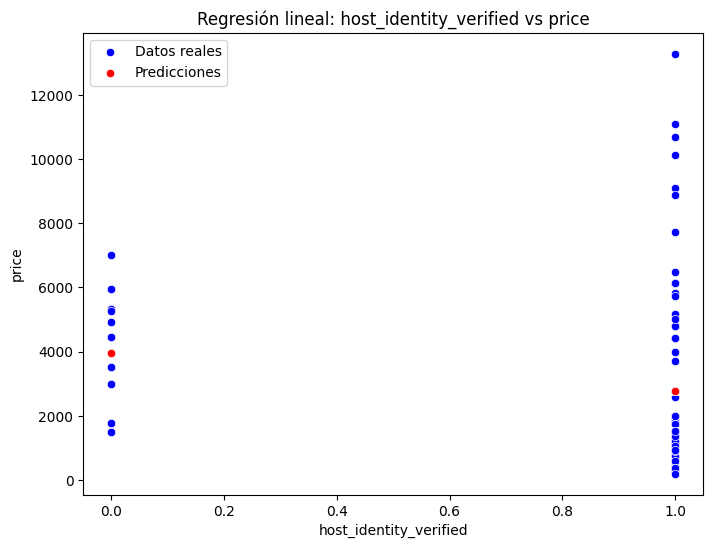

Coeficiente de correlación (r): 0.22175387754741835
Coeficiente de determinación (R^2): 0.049174782207315415
Ecuación de la recta: y = -1185.6557x + 3969.8162


In [141]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#5 -> price vs host_identity_verified


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'host_identity_verified','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

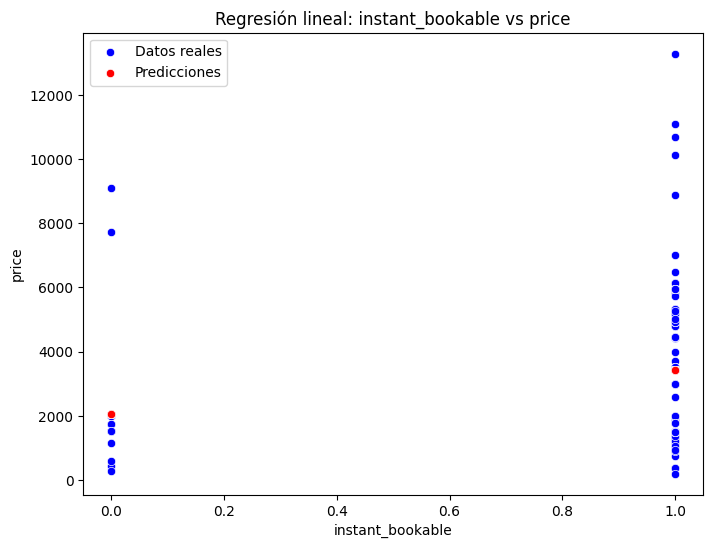

Coeficiente de correlación (r): 0.2100179941368167
Coeficiente de determinación (R^2): 0.04410755786125198
Ecuación de la recta: y = 1351.8215x + 2060.4840


In [142]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#6 -> price vs instant_bookable


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'instant_bookable','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")

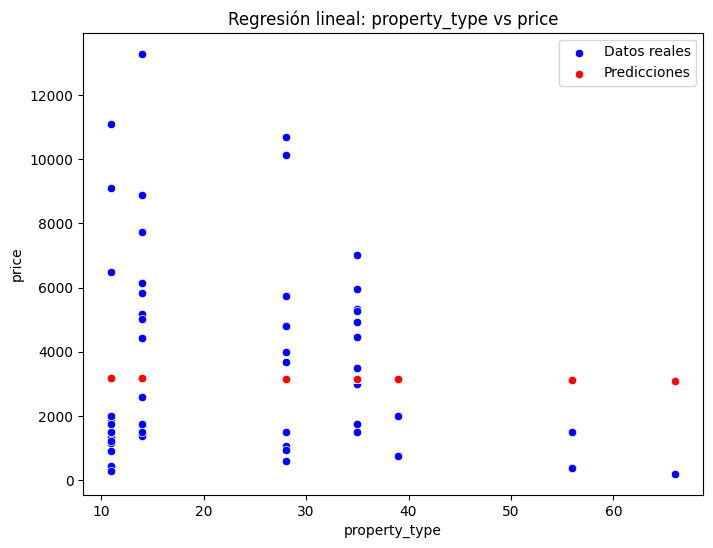

Coeficiente de correlación (r): 0.008279022830099327
Coeficiente de determinación (R^2): 6.854221902130586e-05
Ecuación de la recta: y = -1.6855x + 3206.3406


In [143]:
#Analizar la correlación que existe entre las siguientes variables 
#Donde (dependiente->y, independiente->X)
#7 -> price vs property_type


#regresion_lineal(dataframe, X, y)
coef_correl, coef_deter, ecuacion = regresion_lineal(df4, 'property_type','price')

print(f"Coeficiente de correlación (r): {coef_correl}")
print(f"Coeficiente de determinación (R^2): {coef_deter}")
print(f"Ecuación de la recta: {ecuacion}")